In [ ]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [ ]:
#LOADING DATA FROM CSV FILE
data = pd.read_csv('/content/SampleSuperstore.csv')

In [ ]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
pd.isnull(data).sum()


OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       14
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [ ]:
df.shape


(9994, 13)

In [ ]:
data.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Exploratory Data Analysis


<ipython-input-21-050578973ba0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], color='red', label='Sales', shade=True, bw_adjust=0.5)
<ipython-input-21-050578973ba0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Profit'], color='blue', label='Profit', shade=True, bw_adjust=0.5)


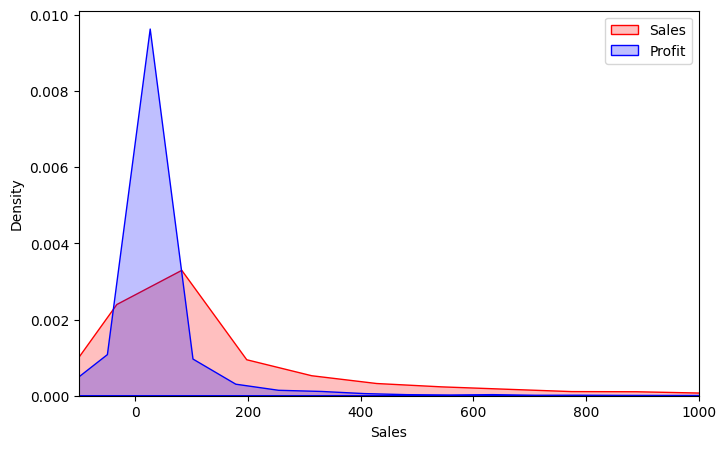

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Sales'], color='red', label='Sales', shade=True, bw_adjust=0.5)
sns.kdeplot(df['Profit'], color='blue', label='Profit', shade=True, bw_adjust=0.5)
plt.xlim([-100, 1000])
plt.legend()
plt.show()


Analysis using Pairplot of each column



[1] Based on the Catagory


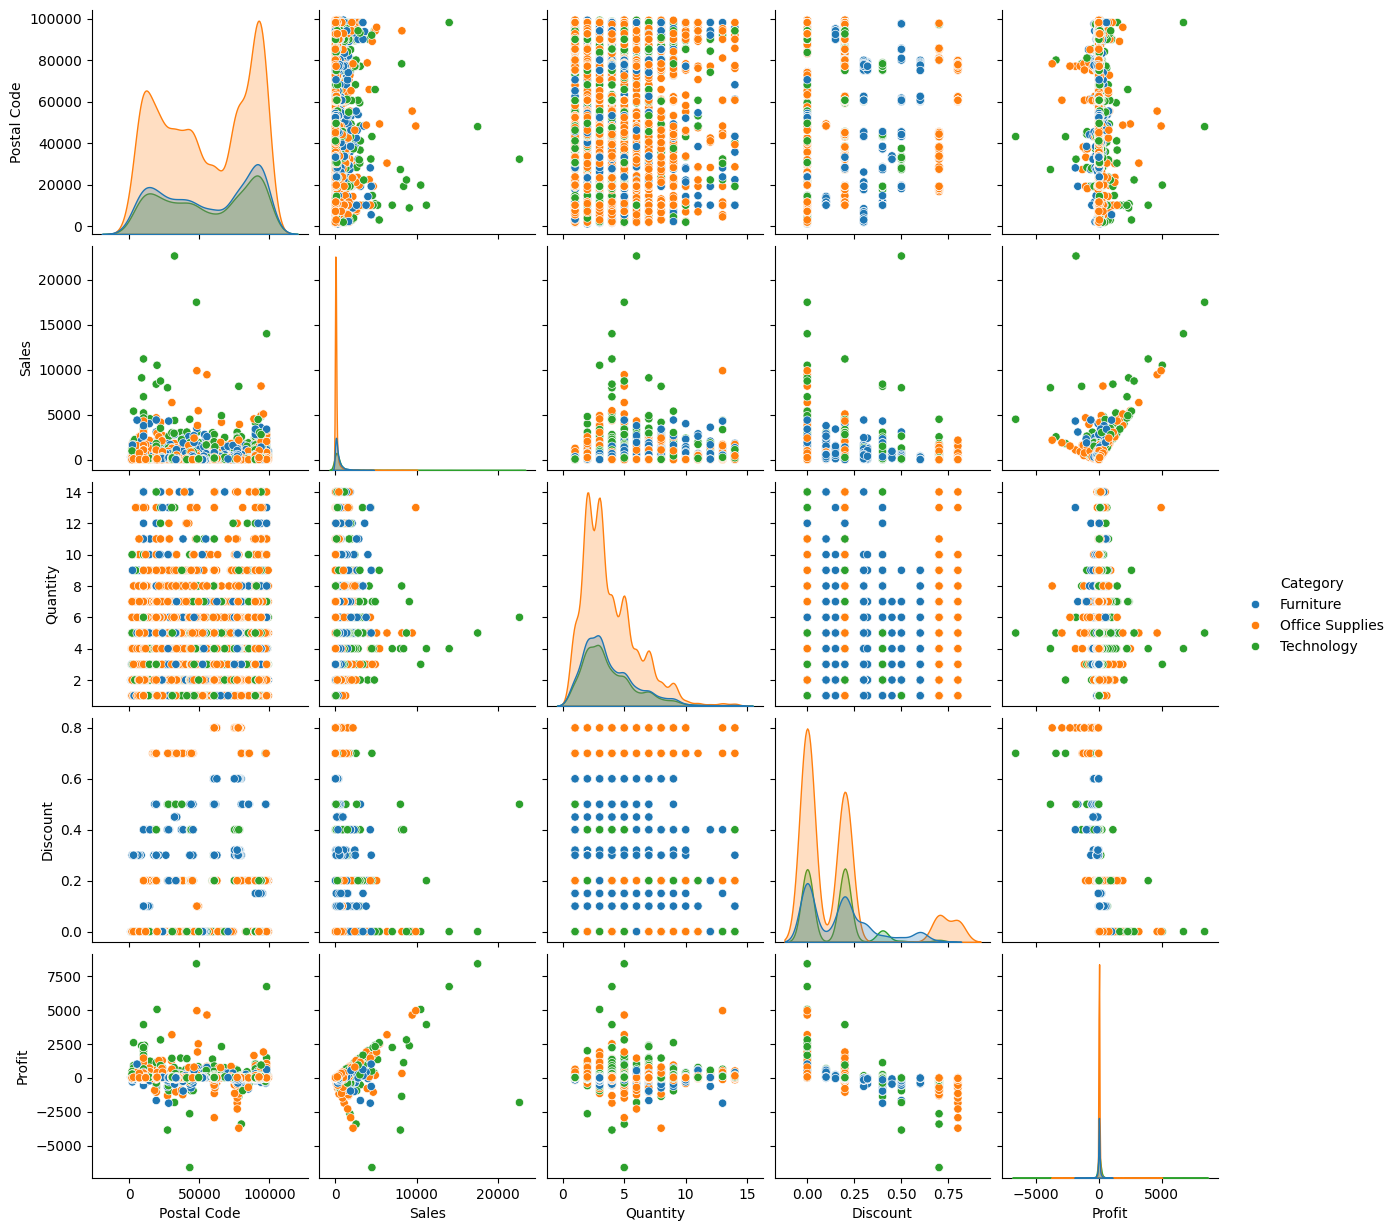

In [ ]:
sns.pairplot(df,hue='Category')


[2] Based on Region


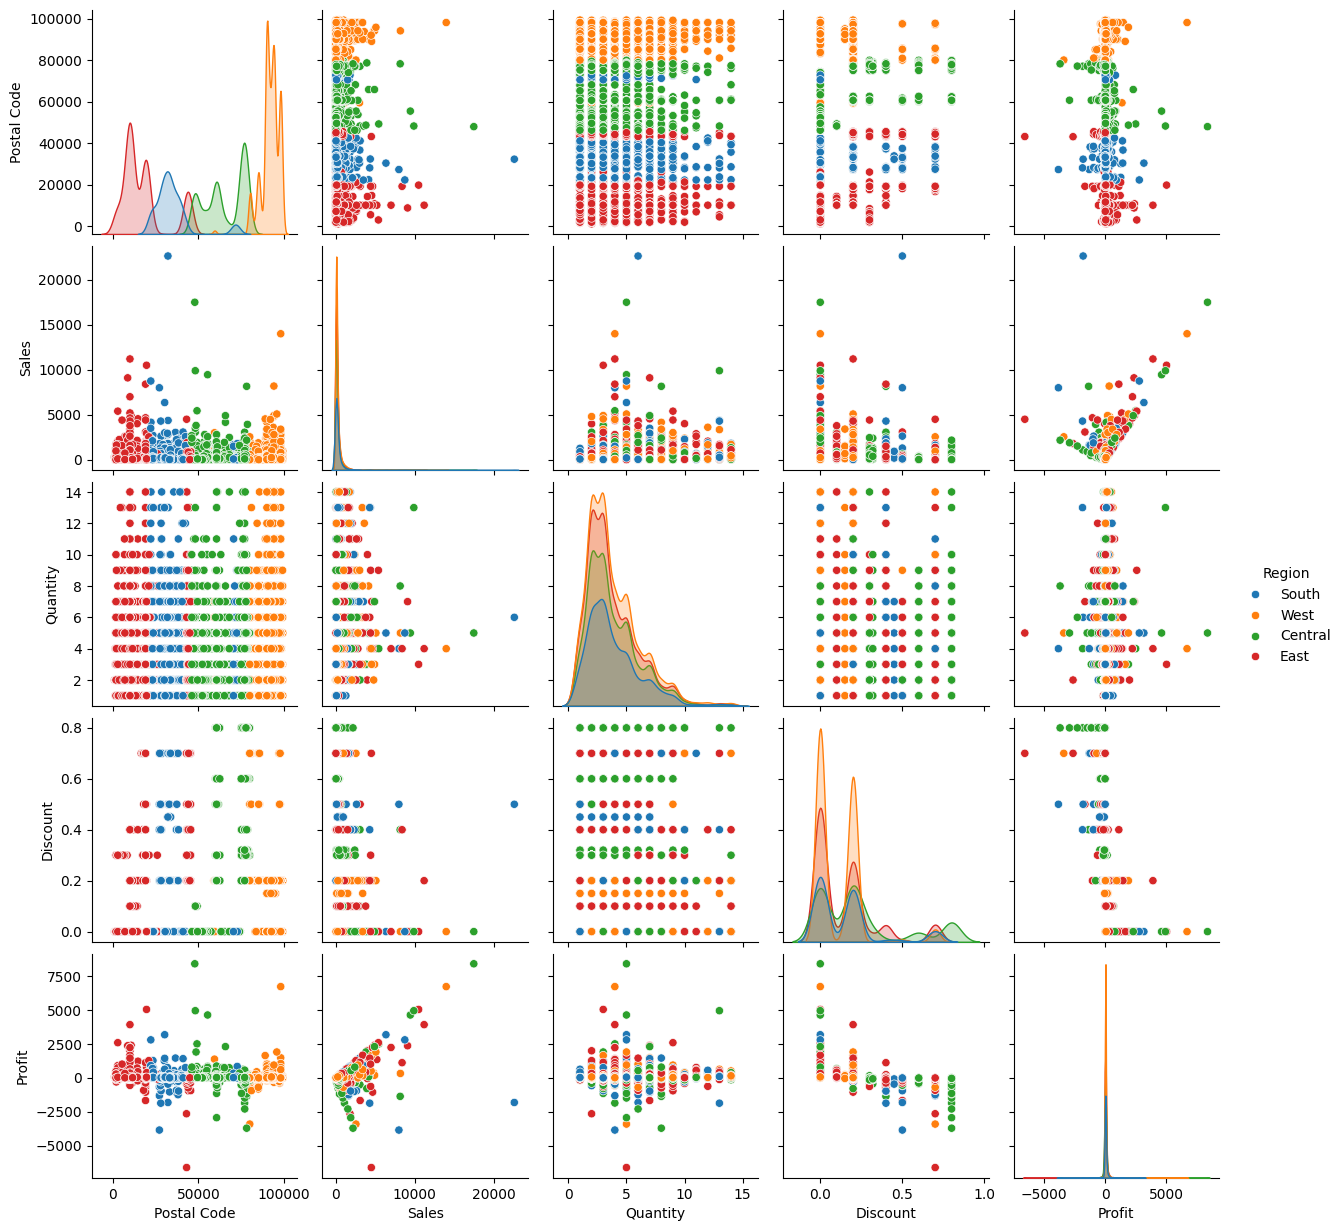

In [ ]:
sns.pairplot(df,hue='Region')


[3] Based on the segment


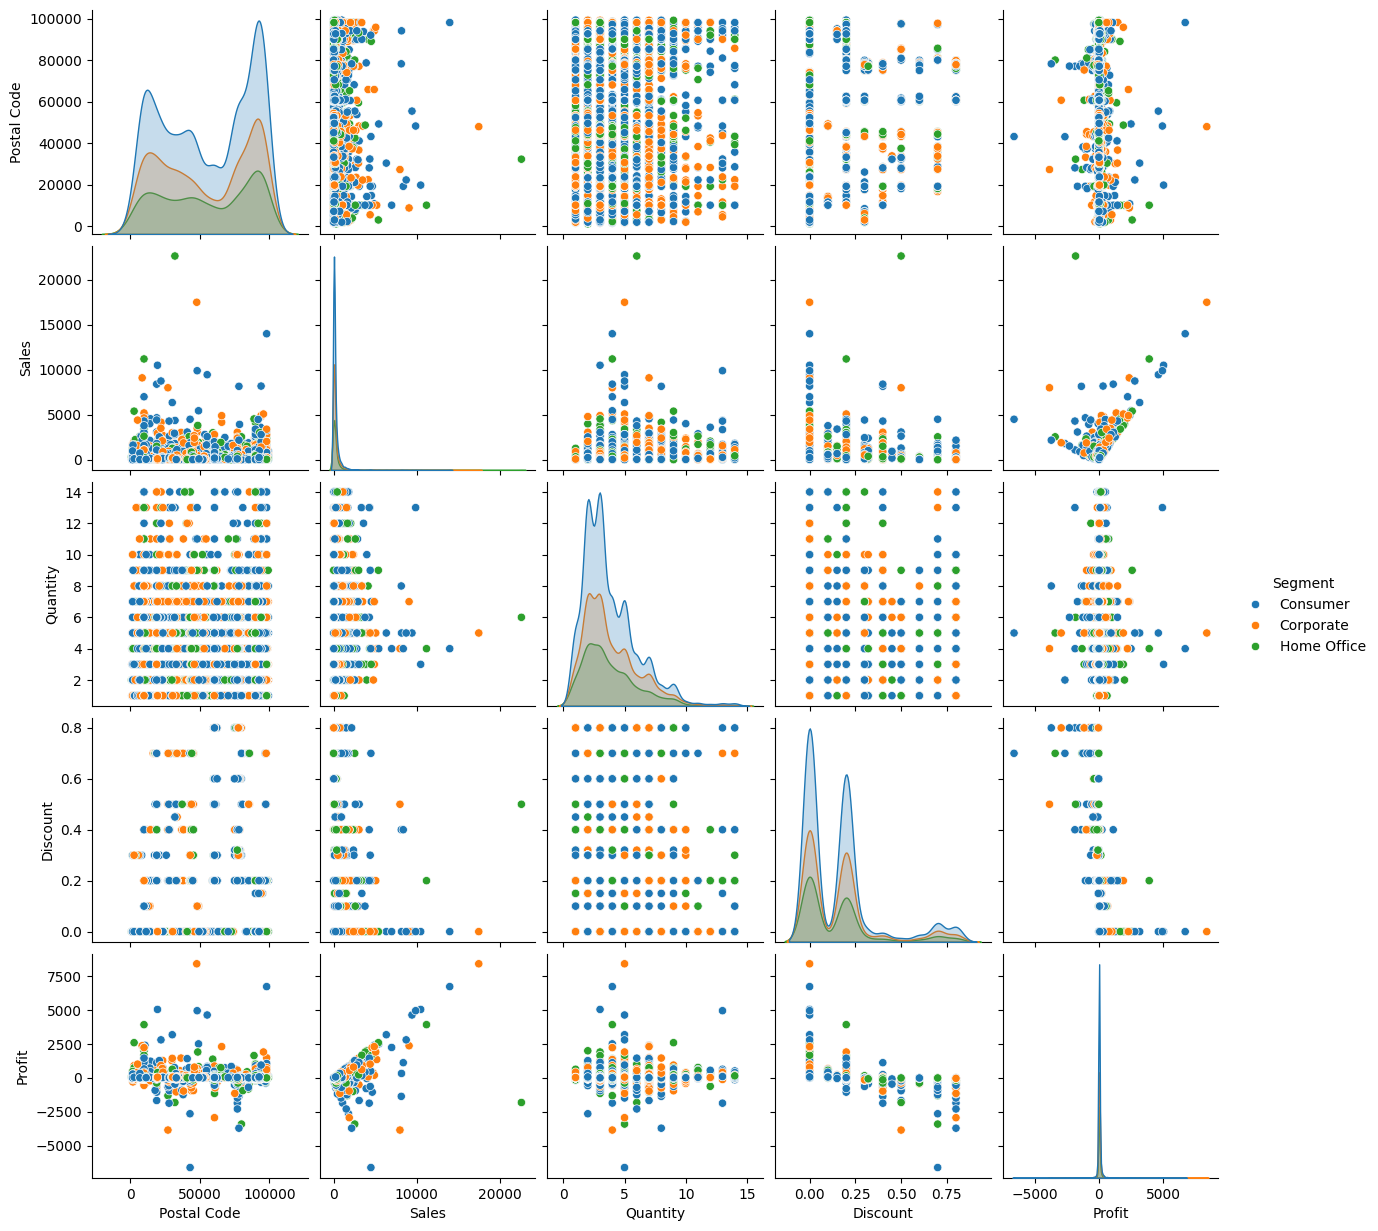

In [ ]:
sns.pairplot(df,hue='Segment')


In [ ]:
# Step 1: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Step 2: Drop non-numeric columns for correlation computation
df_numeric = df.drop(columns=non_numeric_columns)

# Step 3: Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 4: Display the correlation matrix as a formatted table
correlation_matrix.style.format("{:.2f}").background_gradient(cmap='coolwarm')


Heatmap for Correlation


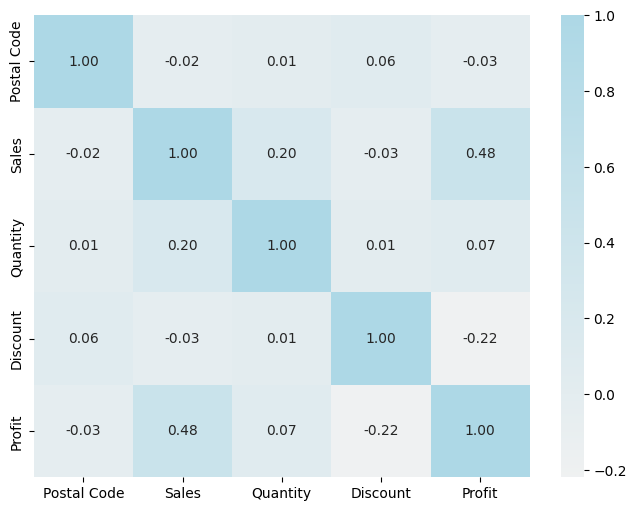

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
corr_matrix = df_numeric.corr()

# Step 3: Plot the heatmap with a custom light blue to white palette
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap=sns.light_palette("lightblue", as_cmap=True), annot=True, fmt=".2f")
plt.show()


From above Heatmap:

*Sales and Profit are Moderately Correlated.
*Discount and Profit are Negatively Correlated
*Quantity and Profit are less Moderately Correlated.




Count plot of each column


<ipython-input-39-71b8d459ea7b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Category'], ax=axs[0, 0], palette=palette)
<ipython-input-39-71b8d459ea7b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Segment'], ax=axs[0, 1], palette=palette)
<ipython-input-39-71b8d459ea7b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Ship Mode'], ax=axs[1, 0], palette=palette)
<ipython-input-39-71b8d459ea7b>:13: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretab

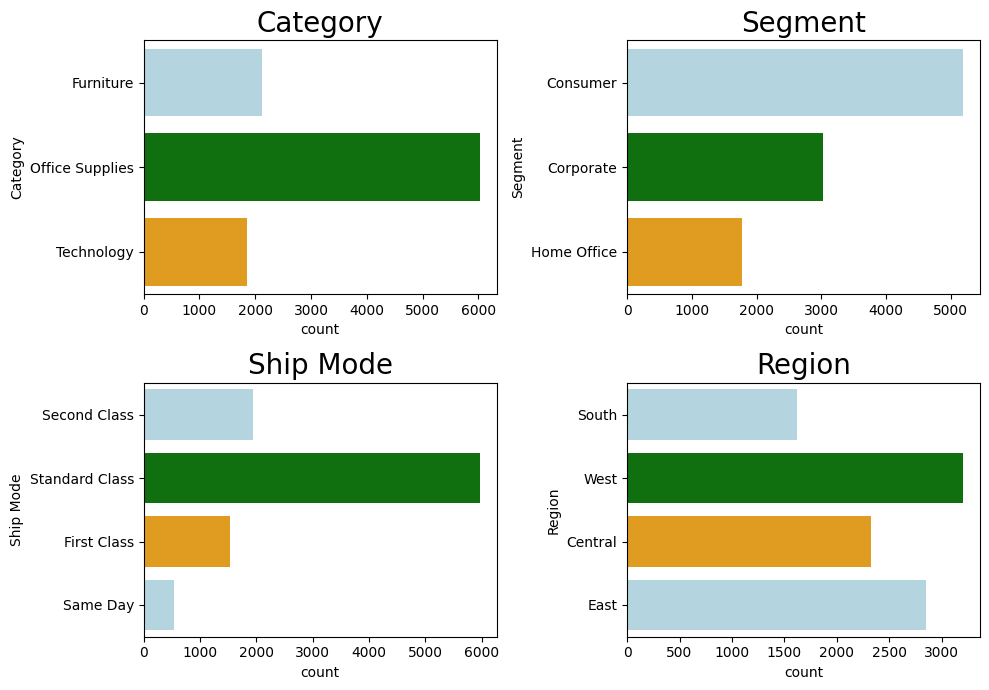

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the custom palette
palette = sns.color_palette(["lightblue", "green", "orange"])

# Create the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Plotting the count plots with the custom palette
sns.countplot(df['Category'], ax=axs[0, 0], palette=palette)
sns.countplot(df['Segment'], ax=axs[0, 1], palette=palette)
sns.countplot(df['Ship Mode'], ax=axs[1, 0], palette=palette)
sns.countplot(df['Region'], ax=axs[1, 1], palette=palette)

# Setting the titles
axs[0, 0].set_title('Category', fontsize=20)
axs[0, 1].set_title('Segment', fontsize=20)
axs[1, 0].set_title('Ship Mode', fontsize=20)
axs[1, 1].set_title('Region', fontsize=20)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


<ipython-input-41-b58399d1d62d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sub-Category', data=df, palette=palette)


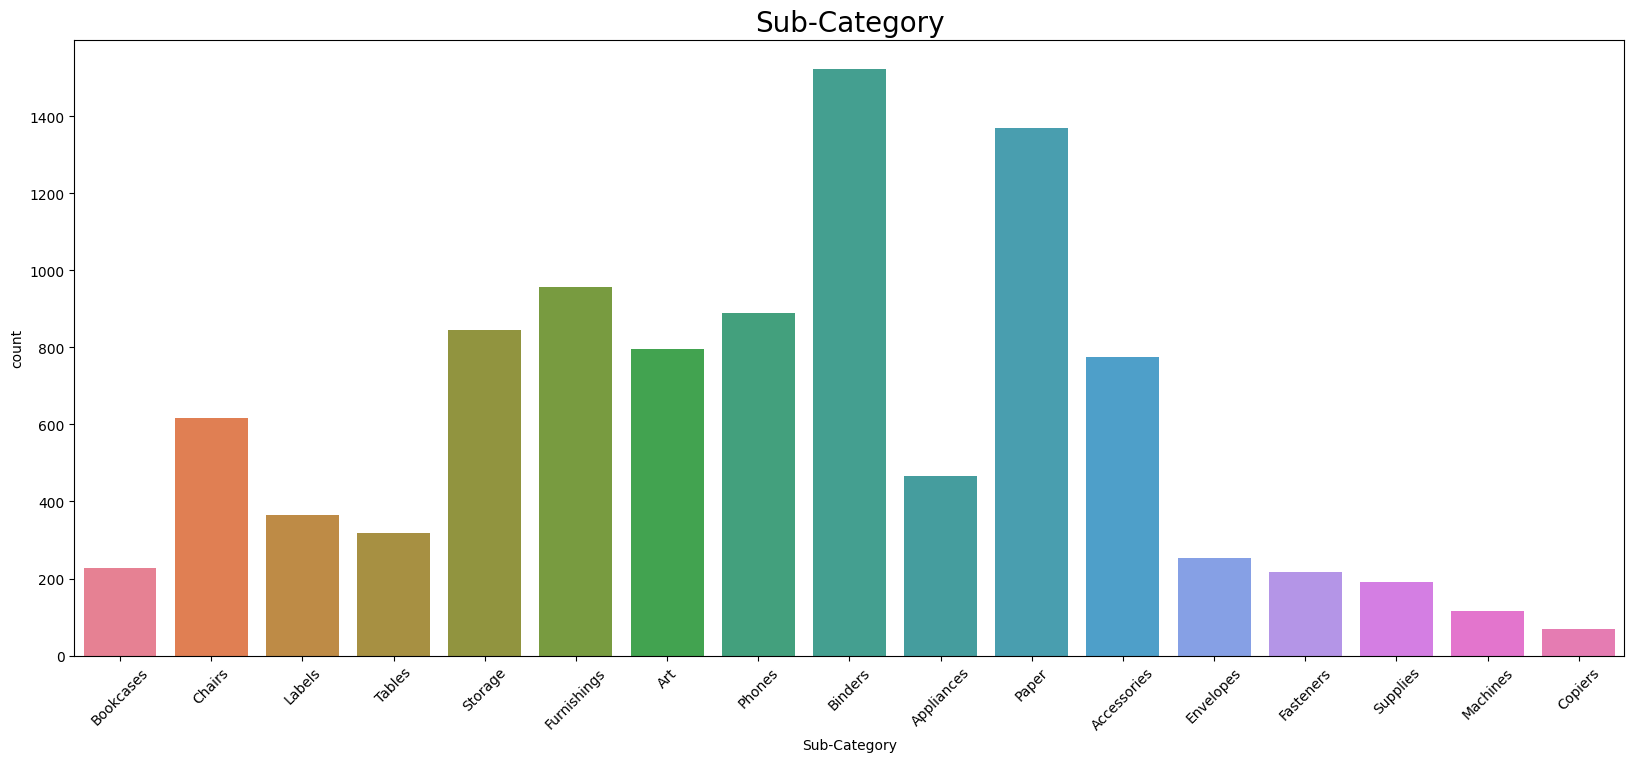

In [ ]:
# Get unique categories for color assignment
categories = df['Sub-Category'].unique()

# Define a color palette with a distinct color for each category
# Here we use a seaborn color palette with a number of colors equal to the number of categories
palette = sns.color_palette("husl", n_colors=len(categories))

# Create the count plot with the custom palette
plt.figure(figsize=(20, 8))
sns.countplot(x='Sub-Category', data=df, palette=palette)
plt.title('Sub-Category', fontsize=20)
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()


<ipython-input-43-8680168485c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette=palette)


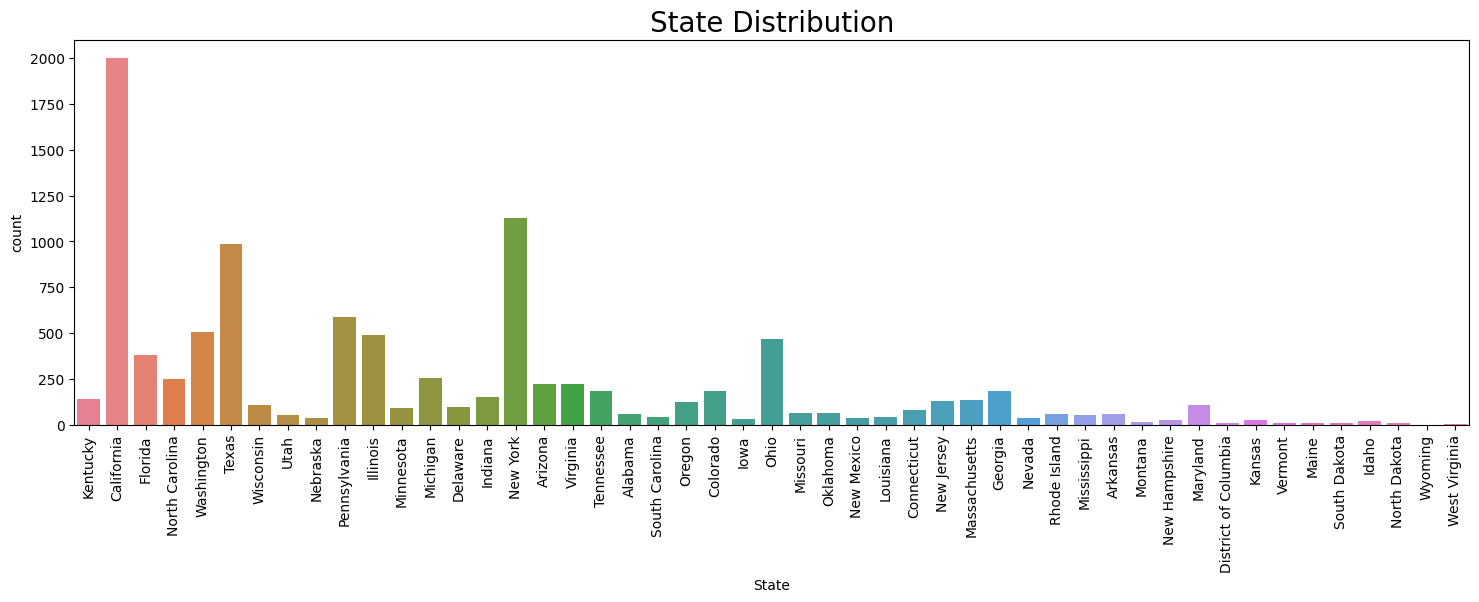

In [ ]:
# Get unique states for color assignment
states = df['State'].unique()

# Define a color palette with a distinct color for each state
palette = sns.color_palette("husl", n_colors=len(states))

# Create the count plot with the custom palette
plt.figure(figsize=(18, 5))
sns.countplot(x='State', data=df, palette=palette)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('State Distribution', fontsize=20)
plt.show()


<ipython-input-44-c127e8b4305d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quantity', data=df, palette=palette)


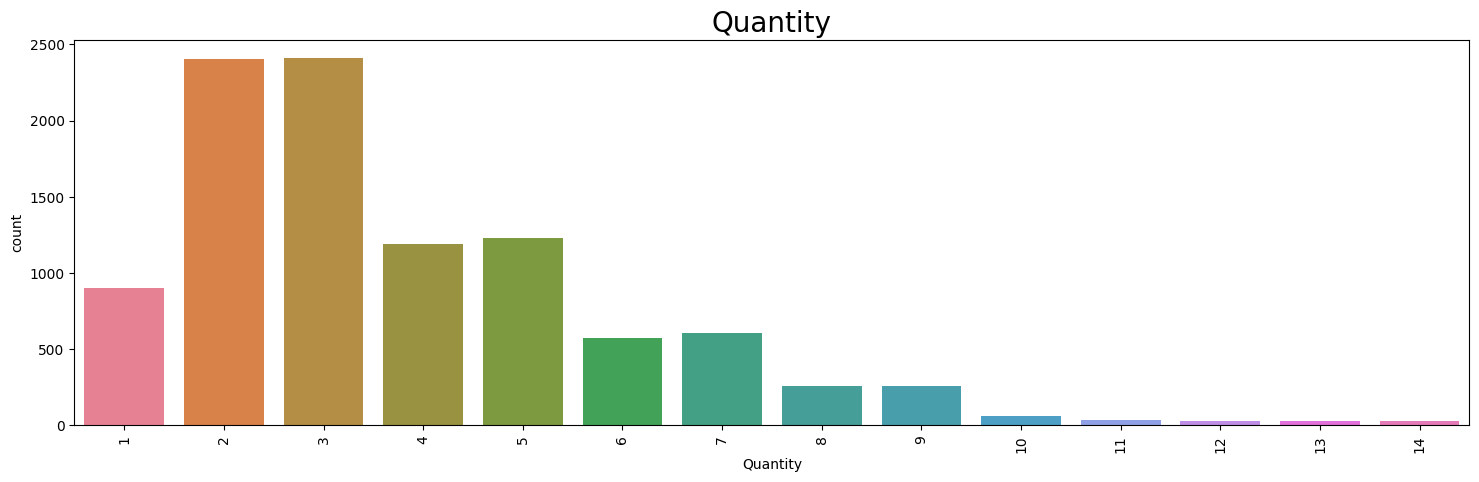

In [ ]:
# Get unique values for Quantity and define a color for each
unique_quantities = df['Quantity'].unique()
num_colors = len(unique_quantities)

# Define a color palette with a number of distinct colors equal to the number of unique quantities
palette = sns.color_palette("husl", n_colors=num_colors)

# Create the count plot with the custom palette
plt.figure(figsize=(18, 5))
sns.countplot(x='Quantity', data=df, palette=palette)
plt.title('Quantity', fontsize=20)
plt.xticks(rotation=90)  # Rotate x labels if needed for better readability
plt.show()


Analysis:As can be observed from the charts, the highest number of products sold come from Clothing category followed by Bikes then components and then Accessories with the least number of products sold.

<ipython-input-45-7e015fc90664>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discount', data=df, palette=palette)


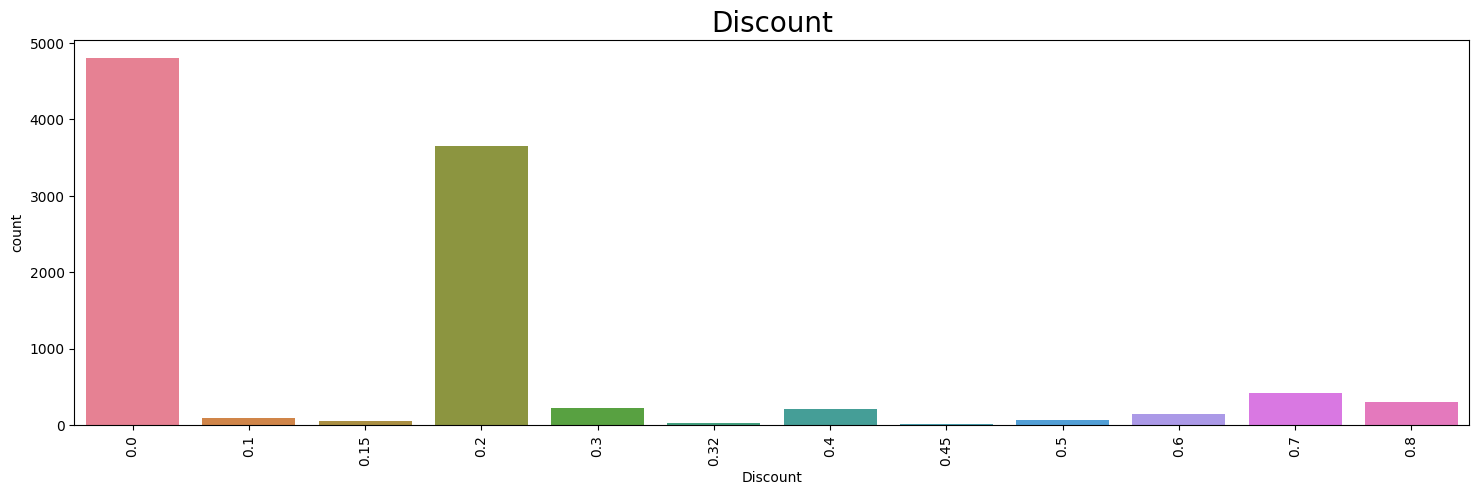

In [ ]:
# Get unique discount values for color assignment
discounts = df['Discount'].unique()

# Define a color palette with a distinct color for each discount value
# Use a seaborn color palette with a number of colors equal to the number of discount values
palette = sns.color_palette("husl", n_colors=len(discounts))

# Create the count plot with the custom palette
plt.figure(figsize=(18, 5))
sns.countplot(x='Discount', data=df, palette=palette)
plt.title('Discount', fontsize=20)
plt.xticks(rotation=90)  # Rotate x labels if needed for better readability
plt.show()


Distribution of the data using the plot


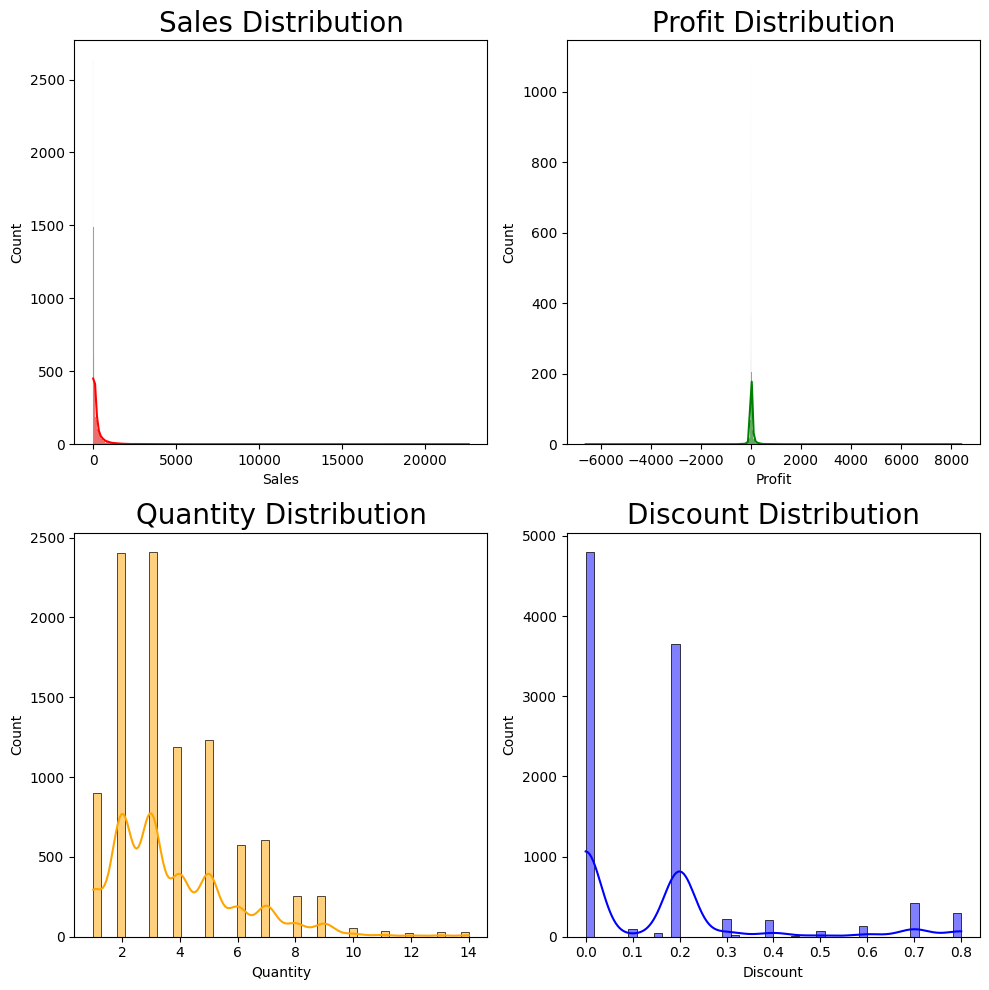

In [ ]:
# Create the subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

# Plotting the histograms with different colors
sns.histplot(df['Sales'], color='red', kde=True, ax=axs[0, 0])
sns.histplot(df['Profit'], color='green', kde=True, ax=axs[0, 1])
sns.histplot(df['Quantity'], color='orange', kde=True, ax=axs[1, 0])
sns.histplot(df['Discount'], color='blue', kde=True, ax=axs[1, 1])

# Setting the titles
axs[0, 0].set_title('Sales Distribution', fontsize=20)
axs[0, 1].set_title('Profit Distribution', fontsize=20)
axs[1, 0].set_title('Quantity Distribution', fontsize=20)
axs[1, 1].set_title('Discount Distribution', fontsize=20)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


Statewise Deal Analysis


In [ ]:
df['Country'].value_counts()


Country
United States    9994
Name: count, dtype: int64

In [ ]:
df1 = df['State'].value_counts()
df1.head(10)


State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64

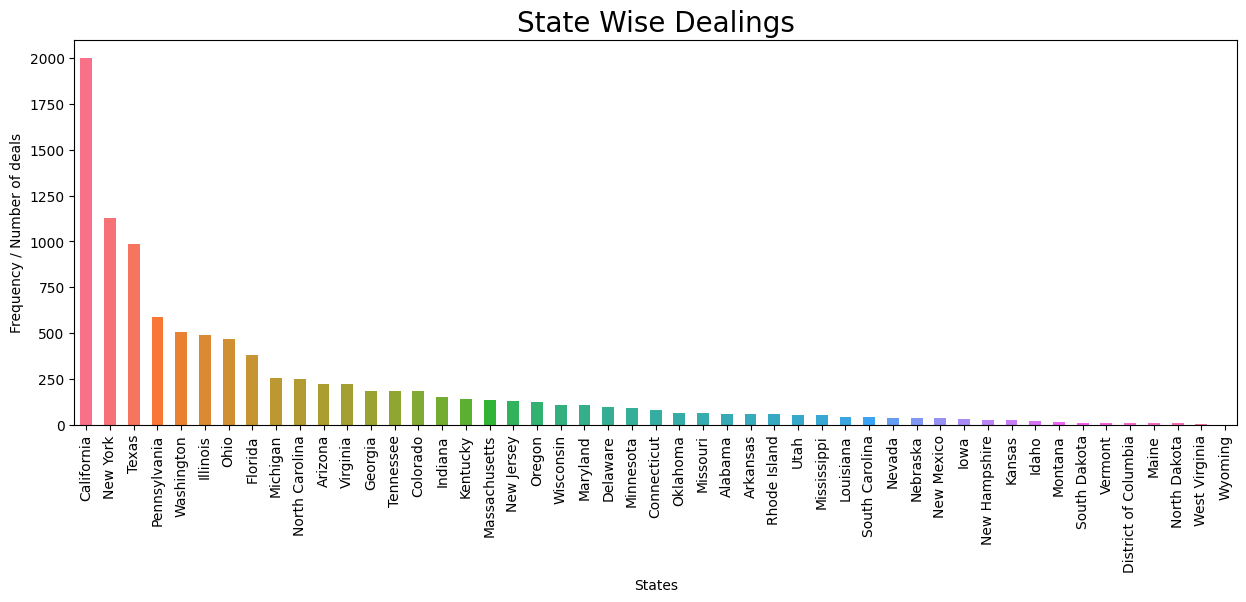

In [ ]:
num_colors = len(df1)
palette = sns.color_palette("husl", n_colors=num_colors)

# Create the bar plot with the custom colors
ax = df1.plot(kind='bar', figsize=(15, 5), color=palette)
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize=20)
plt.show()


Here is top 3 state where deals are Highest.
*Califonia
*New York
*Texas

Wyoming: Lowest Number of deal



In [ ]:
df['State'].value_counts().mean()


203.9591836734694

Average number of deal per state is 204.

City Wise analysis of the dealing


In [ ]:
df2 = df['City'].value_counts()
df2=df2.head(50)


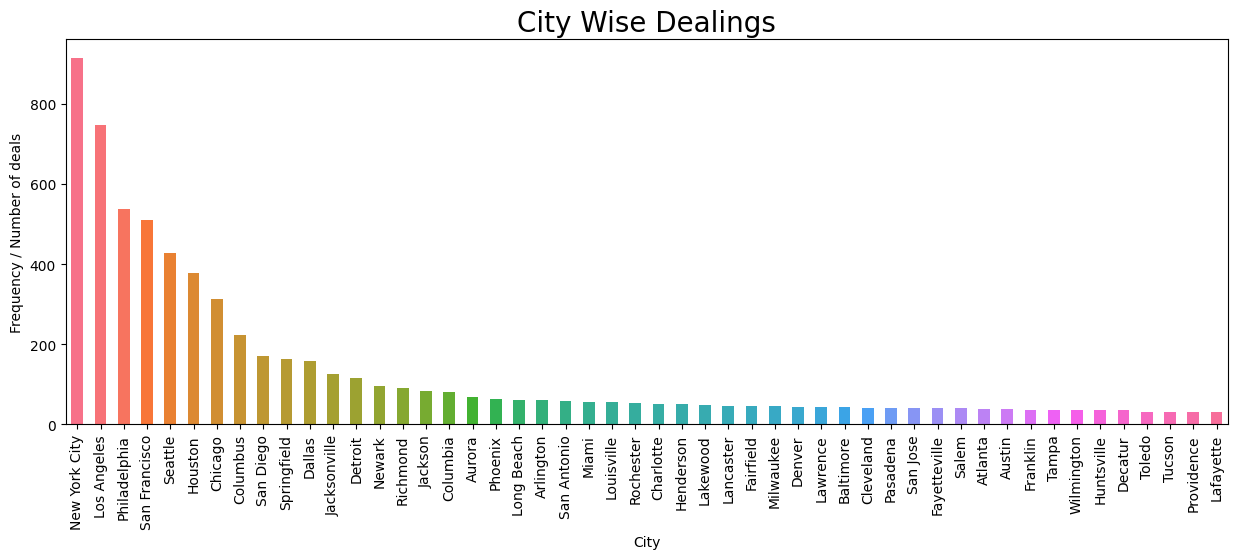

In [ ]:
num_colors = len(df2)
palette = sns.color_palette("husl", n_colors=num_colors)

# Create the bar plot with the custom colors
ax = df2.plot(kind='bar', figsize=(15, 5), color=palette)
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize=20)
plt.show()


Here is top 3 city where deals are Highest. 1. New York City 2. Los Angeles 3. Philadelphia



In [ ]:
df['City'].value_counts().mean()


18.821092278719398

Average number of deal per city is 19.

Segment wise analysis of Profit, Discount and sell


In [ ]:
df['Segment'].value_counts()


Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [ ]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment


Sales  Discount     Profit
Segment                                     
Consumer     223.733644  0.158141  25.836873
Corporate    233.823300  0.158228  30.456667
Home Office  240.972041  0.147128  33.818664

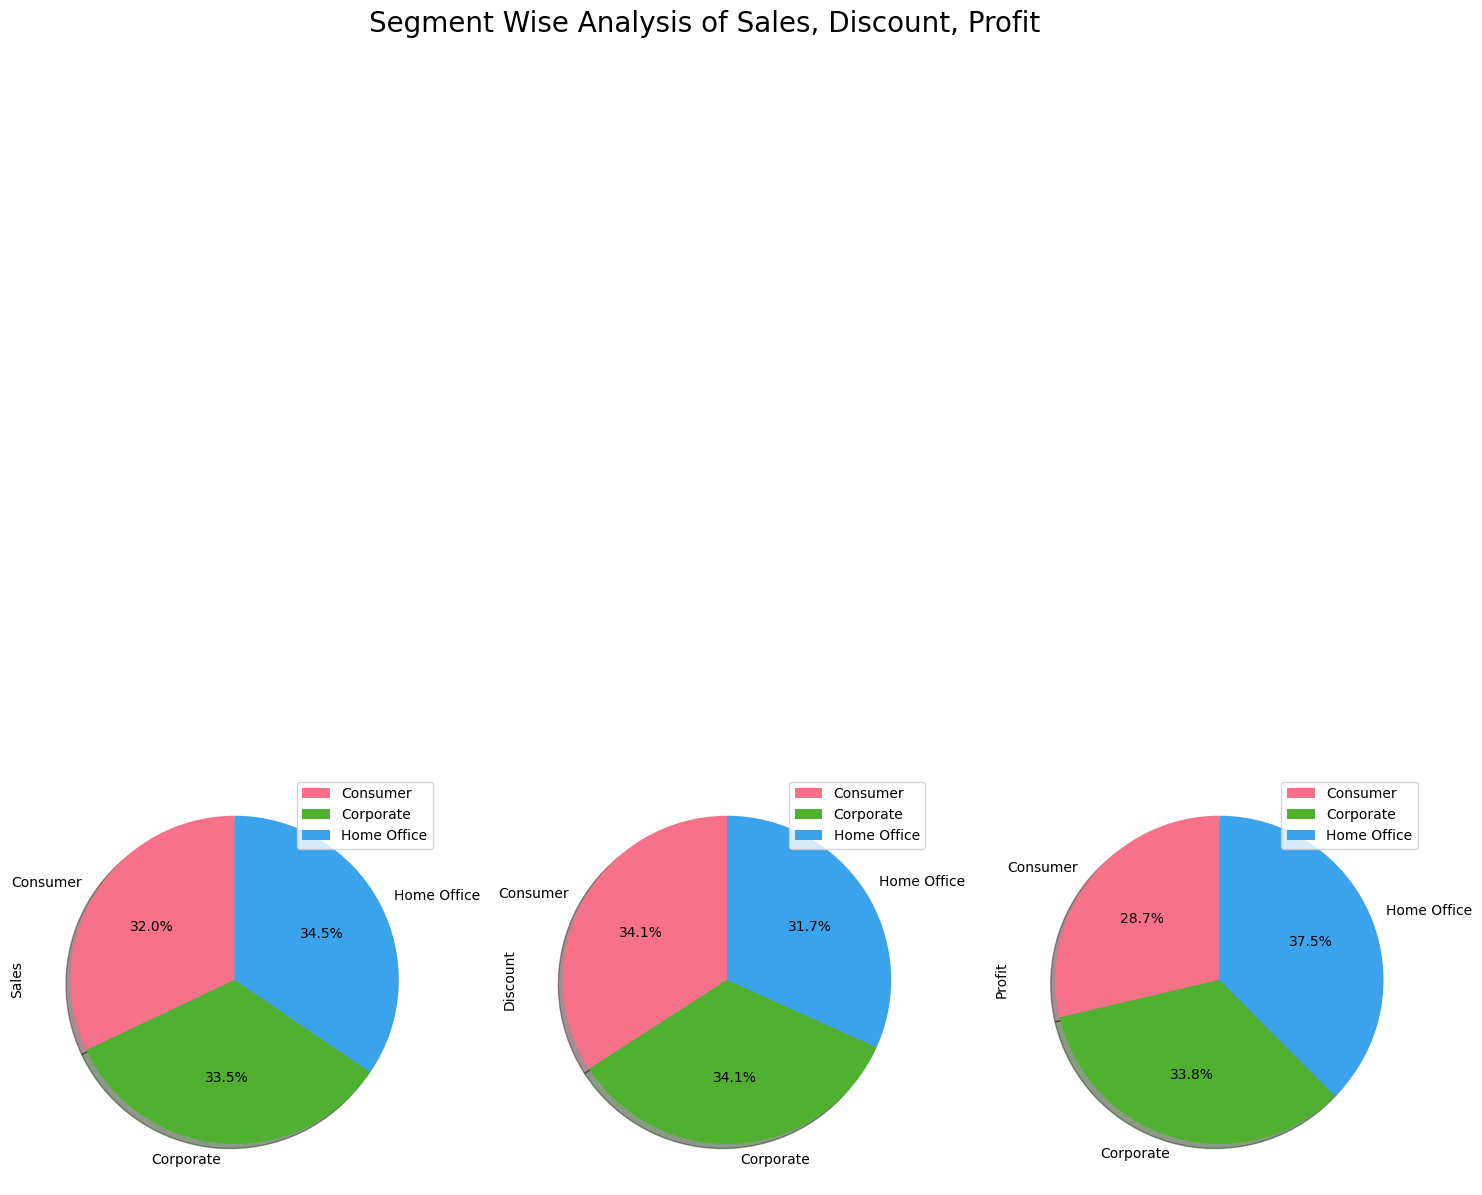

In [ ]:
palette = sns.color_palette("husl", n_colors=len(df_segment.columns))

# Plotting pie charts for each column
axes = df_segment.plot.pie(subplots=True,
                           autopct='%1.1f%%',
                           figsize=(18, 20),
                           startangle=90,     # start angle 90°
                           shadow=True,
                           colors=palette,
                           labels=df_segment.index)

# Setting title
plt.suptitle('Segment Wise Analysis of Sales, Discount, Profit', fontsize=20)

# Display the plot
plt.show()


Sales:
*Consumer : 32%
*Corporate - 33.5%
*Home Office : 34.5

 Discount :

*Consumer : 15.8%
*Corporate : 15.8%
*Home Office : 14.7%

Profit :

*Consumer : 15.8%
*Corporate : 15.8%
*Home Office : 14.7%

Statewise analysis of Profit Discount and sell

In [ ]:
df['State'].value_counts().head(10)


State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64

In [ ]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)


Sales  Discount      Profit
State                                                 
Alabama               319.846557  0.000000   94.865989
Arizona               157.508933  0.303571  -15.303235
Arkansas              194.635500  0.000000   66.811452
California            228.729451  0.072764   38.171608
Colorado              176.418231  0.316484  -35.867351
Connecticut           163.223866  0.007317   42.823071
Delaware              285.948635  0.006250  103.930988
District of Columbia  286.502000  0.000000  105.958930
Florida               233.612815  0.299347   -8.875461
Georgia               266.825217  0.000000   88.315453

[1] Statewise Profit Analysis



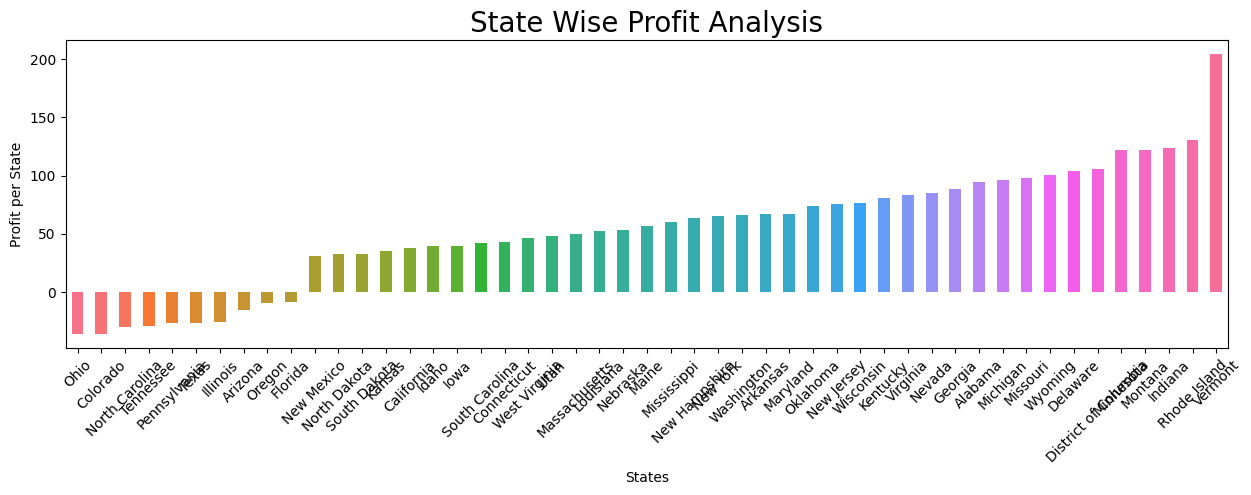

In [ ]:
df_state1 = df_state.sort_values('Profit')

# Define the number of unique colors needed
num_colors = len(df_state1)

# Create a color palette with distinct colors
palette = sns.color_palette("husl", n_colors=num_colors)

# Create the bar plot with the custom colors
ax = df_state1['Profit'].plot(kind='bar', figsize=(15, 4), color=palette)
plt.title('State Wise Profit Analysis', fontsize=20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.xticks(ticks=range(len(df_state1)), labels=df_state1.index, rotation=45)
plt.show()


RESULT

*Vermont: Highest Profit

*Ohio: Lowest Profit

[2] Statewise Sale Analysis



Text(0.5, 1.0, 'State wise analysis of Sale')

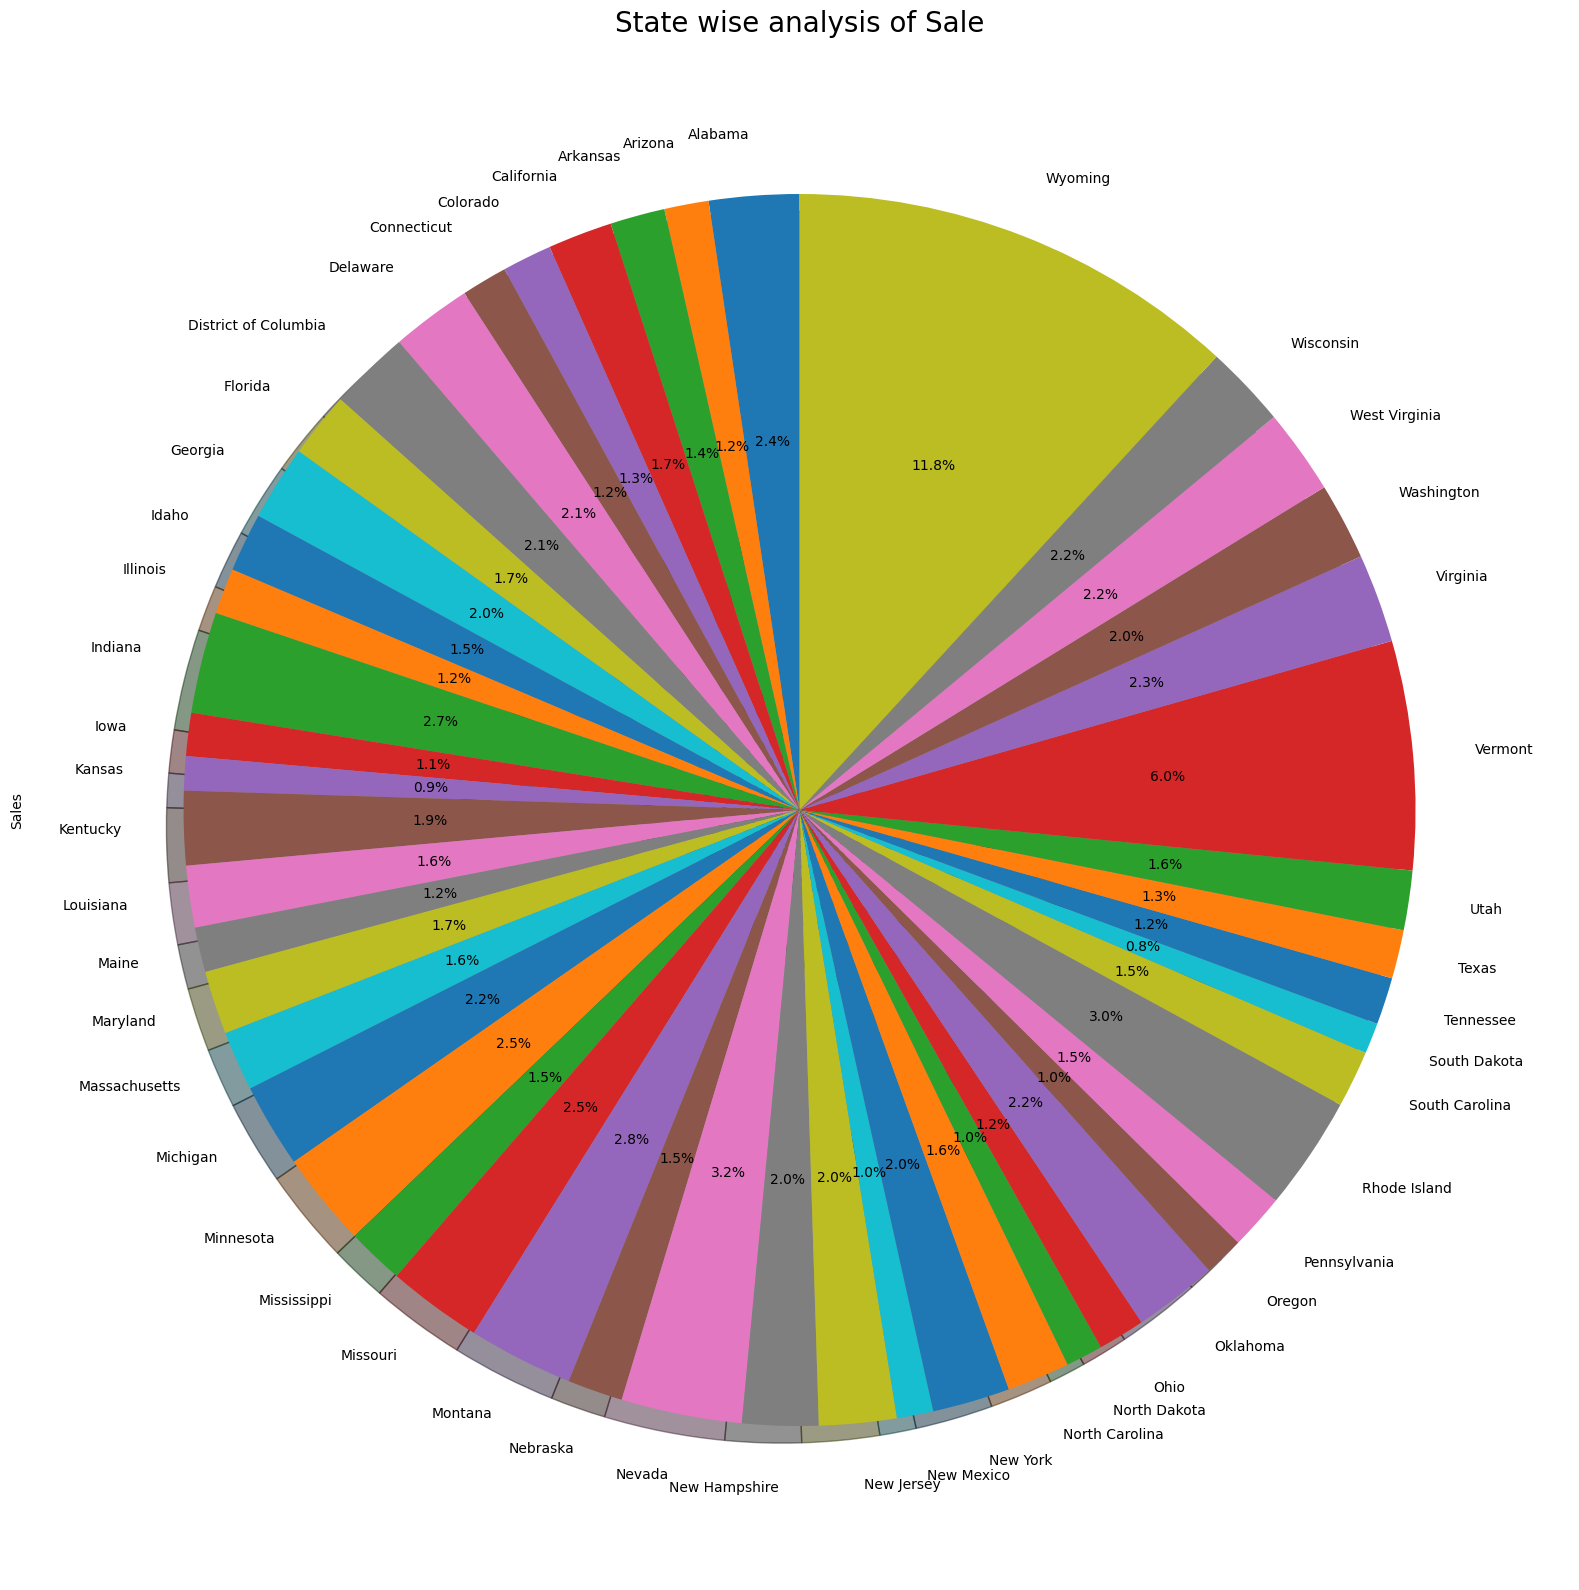

In [ ]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

*Highest amount of sales= Wyoming(11.8%)
*Lowest amount of sales= South Dakota(0.8%)

[3] Statewise Discount Analysis



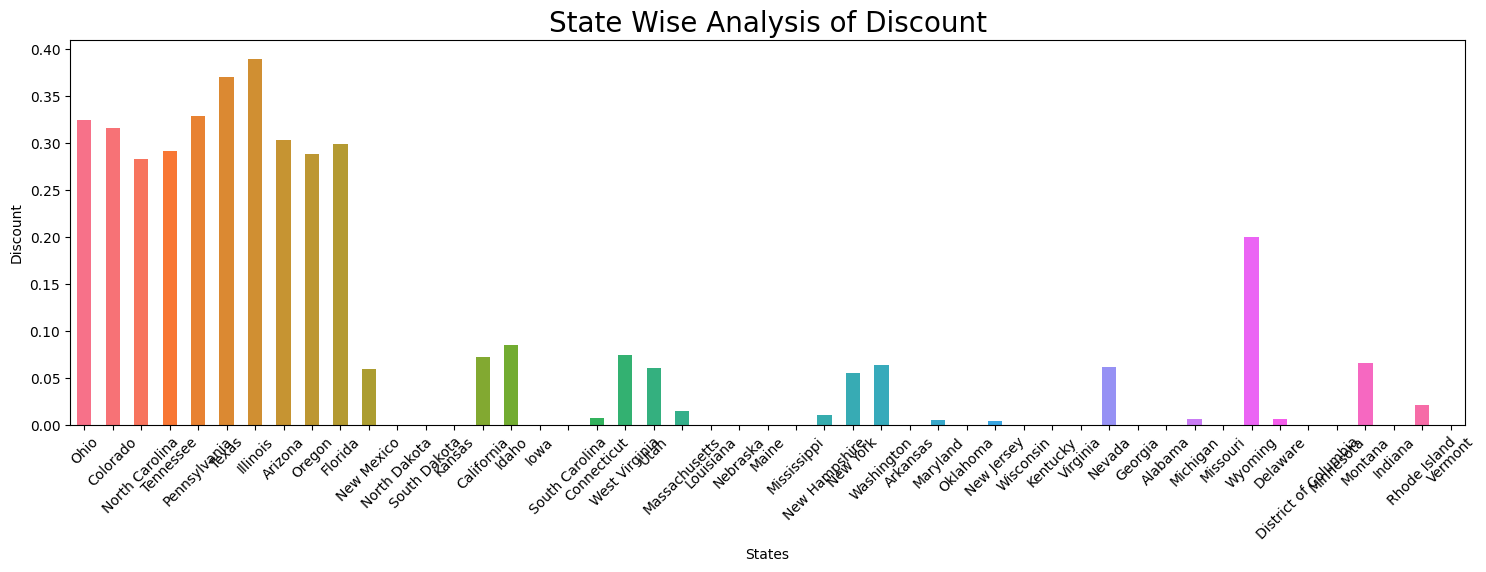

In [ ]:
num_colors = len(df_state1)

# Create a color palette with distinct colors
palette = sns.color_palette("husl", n_colors=num_colors)

# Create the bar plot with the custom colors
ax = df_state1['Discount'].plot(kind='bar', figsize=(18, 5), color=palette)
plt.title('State Wise Analysis of Discount', fontsize=20)
plt.ylabel('Discount')
plt.xlabel('States')
plt.xticks(ticks=range(len(df_state1)), labels=df_state1.index, rotation=45)
plt.show()


Illinois at the top

Citywise Analysis of the Profit


In [ ]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

Sales  Discount      Profit
City                                        
Bethlehem   337.926800  0.380000 -200.619160
Champaign   151.960000  0.600000 -182.352000
Oswego      107.326000  0.600000 -178.709200
Round Rock  693.436114  0.274286 -169.061614
Lancaster   215.031826  0.315217 -157.371052

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

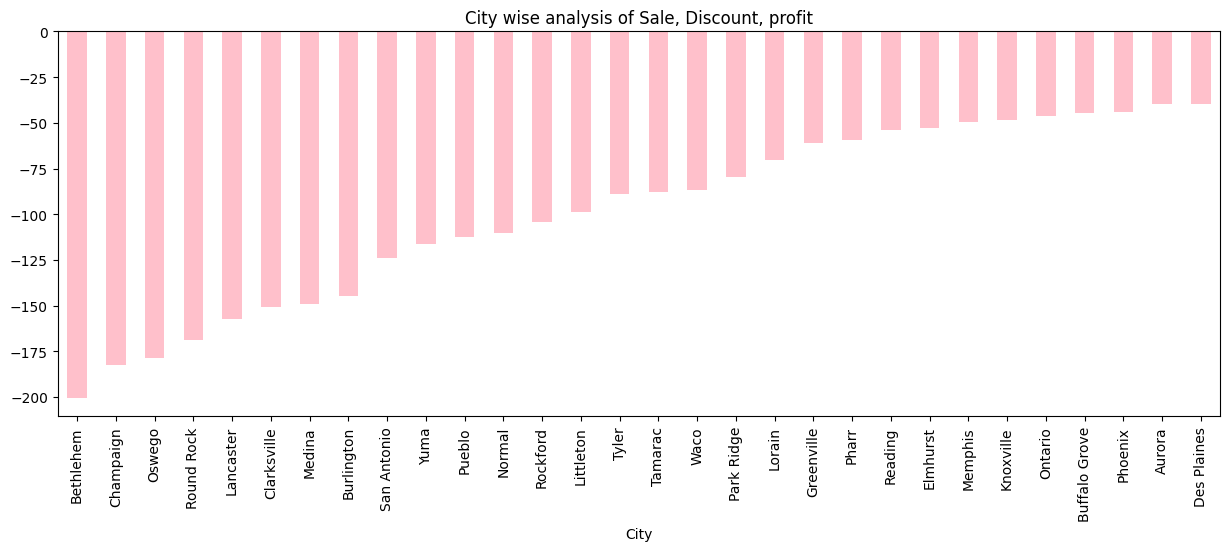

In [ ]:
#1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

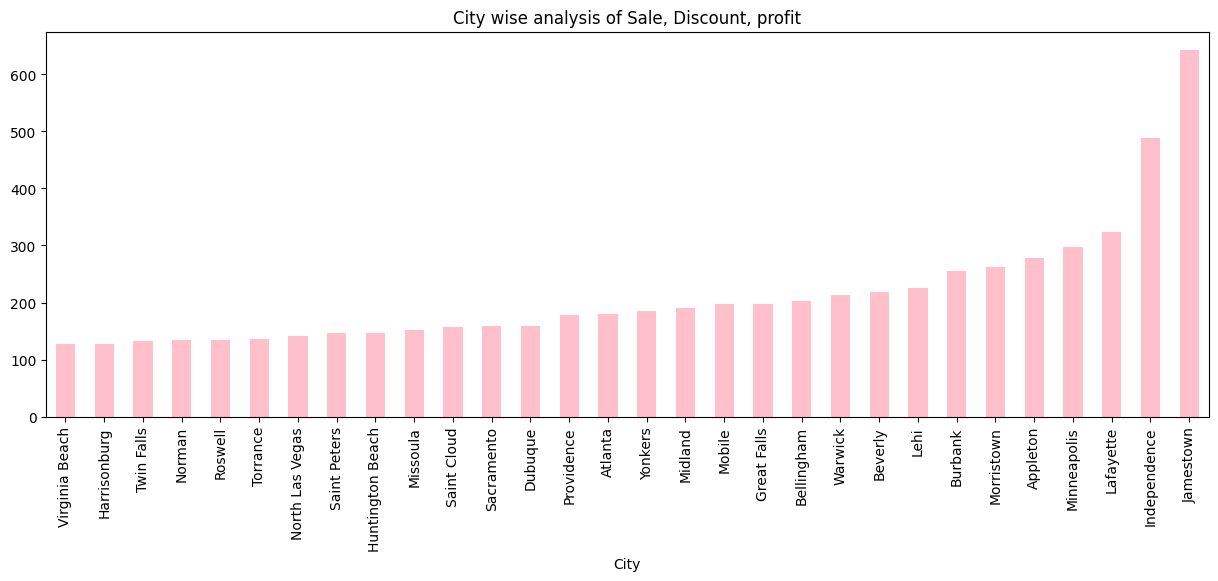

In [ ]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

30 CITIES WHICH HAS PROFIT IN POSITIVE

30 CITIES WHICH HAS PROFIT IN NEGATIVE

THE BALANCE IS PRETTY GOOD HERE!

QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS

In [ ]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)


Sales  Discount     Profit
Quantity                                 
1          59.234632  0.152959   8.276396
2         120.354488  0.154858  16.006831
3         175.201578  0.153329  23.667715
4         271.764059  0.157708  37.131310
5         337.936339  0.157146  40.257394
6         362.101960  0.166556  18.051517
7         395.888393  0.161980  56.579163
8         458.210802  0.171595  42.244342
9         498.083683  0.147946  68.557716
10        422.046737  0.190702  35.862404

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

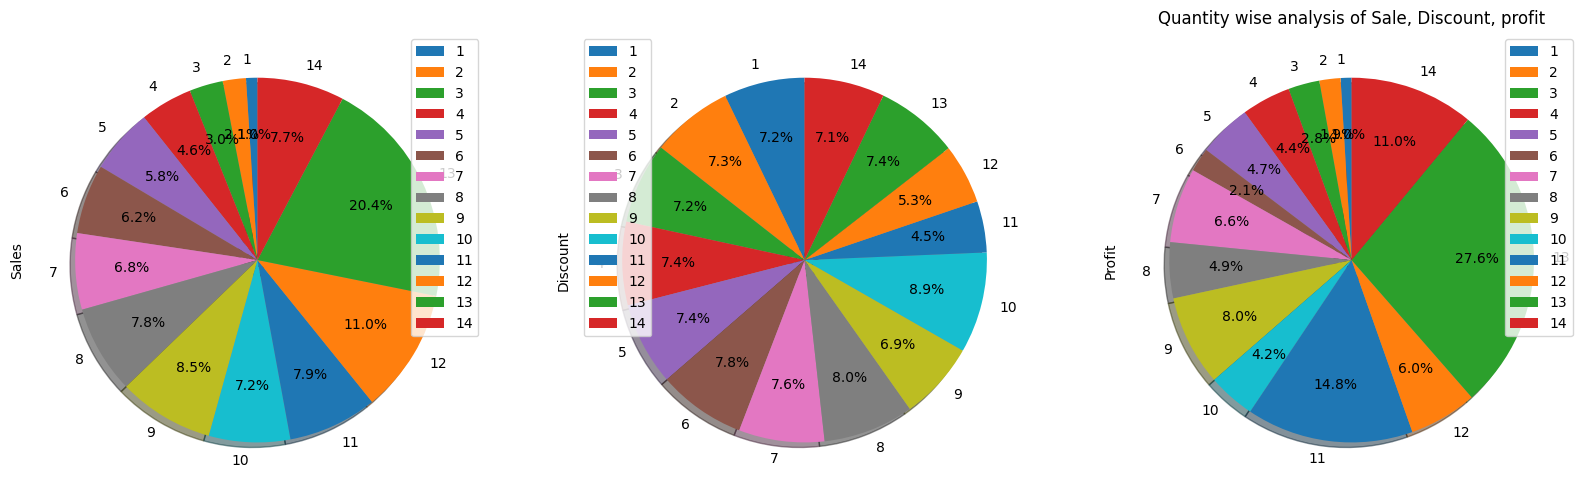

In [ ]:
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')


13 Number of Quantity is high for sales and Profit.

CATAGORY WISE SALES DISCOUNT AND PROFIT

In [ ]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category


Sales  Discount     Profit
Category                                        
Furniture        349.834887  0.173923   8.699327
Office Supplies  119.324101  0.157285  20.327050
Technology       452.709276  0.132323  78.752002

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

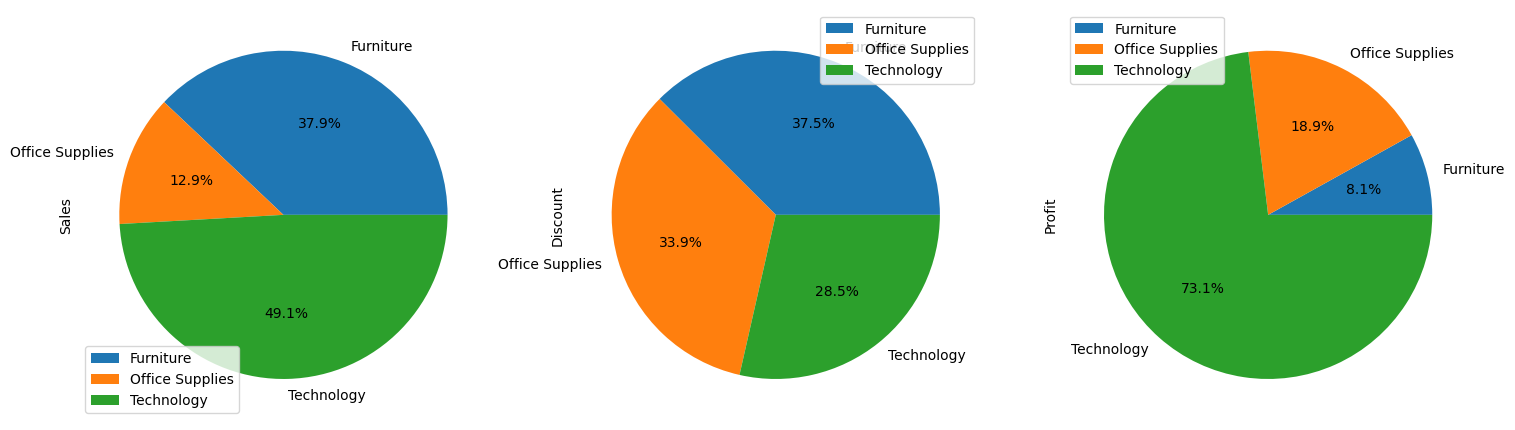

In [ ]:
df_category.plot.pie(subplots=True,
                     figsize=(18, 20),
                     autopct='%1.1f%%',
                     labels = df_category.index)


*Maximun sales and Profit obtain in Technology.
*Minimun profit obtain in Furniture
Sub-Category wise Sales, Profit and Discount

Sub-Category wise Sales, Profit and Discount


In [ ]:
import pandas as pd

# Example of loading from a CSV file
df = pd.read_csv('/content/SampleSuperstore.csv')

# Then group by 'Sub-Category' and calculate the mean of 'Sales', 'Discount', and 'Profit'
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()

# Display the first 10 rows
df_sub_category.head(10)


Sales  Discount      Profit
Sub-Category                                   
Accessories    215.974604  0.078452   54.111788
Appliances     230.755710  0.166524   38.922758
Art             34.068834  0.074874    8.200737
Binders        133.560560  0.372292   19.843574
Bookcases      503.859633  0.211140  -15.230509
Chairs         532.332420  0.170178   43.095894
Copiers       2198.941618  0.161765  817.909190
Envelopes       64.867724  0.080315   27.418019
Fasteners       13.936774  0.082028    4.375660
Furnishings     95.825668  0.138349   13.645918

[1] BASED ON THE SALES



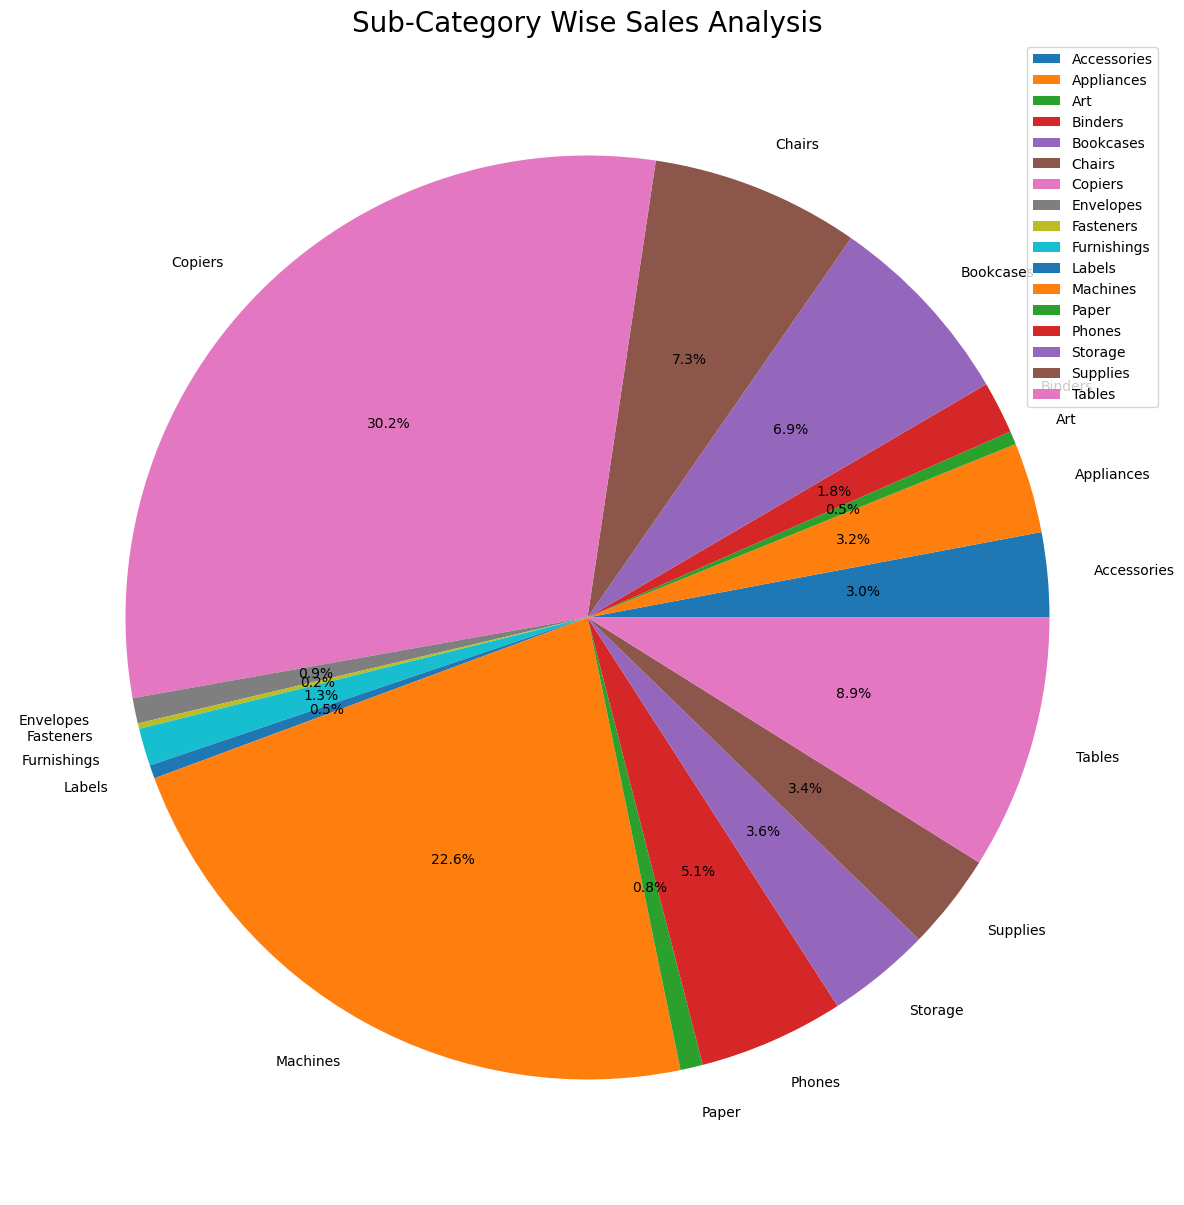

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_sub_category has been created
plt.figure(figsize=(15, 15))
plt.pie(df_sub_category['Sales'], labels=df_sub_category.index, autopct='%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize=20)
plt.legend()
plt.show()





[2] BASED ON THE DISCOUNT



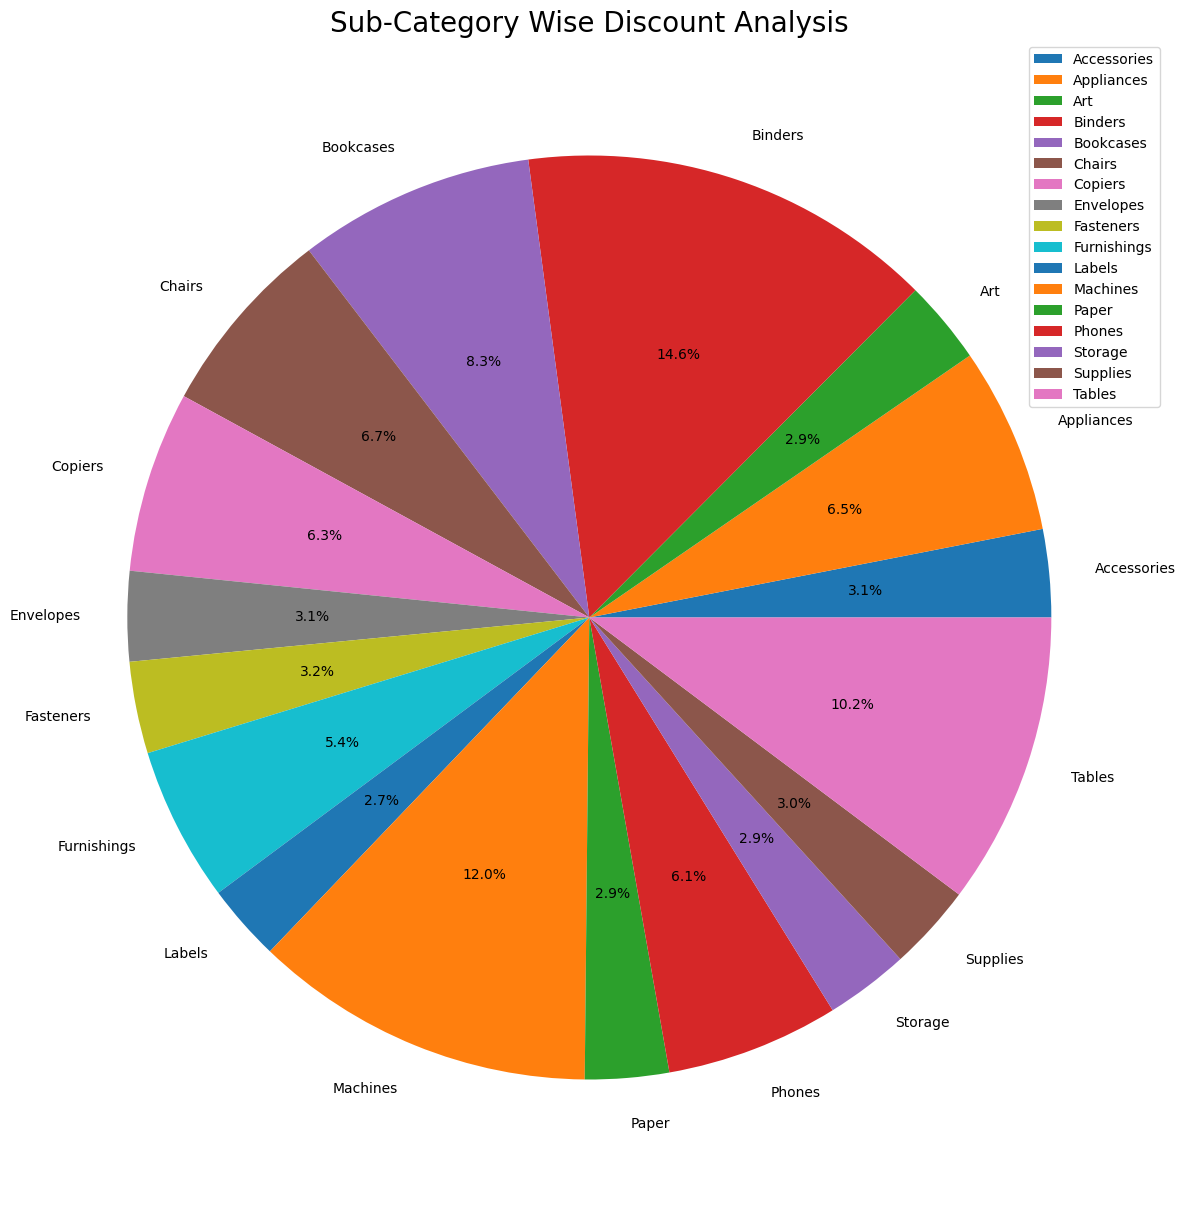

In [ ]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

[3] BASED ON THE PROFIT



<Axes: xlabel='Sub-Category'>

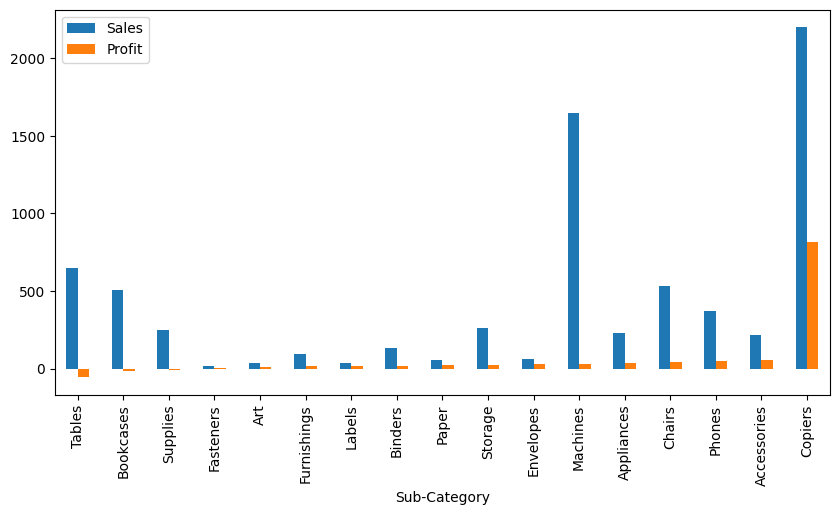

In [ ]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

COPIER : HIGHEST PROFIT AS WELL AS SELL

REGION WISE ANALYSIS


In [ ]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region


Sales  Discount     Profit
Region                                  
Central  215.772661  0.240353  17.092709
East     238.336110  0.145365  32.135808
South    241.803645  0.147253  28.857673
West     226.493233  0.109335  33.849032

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

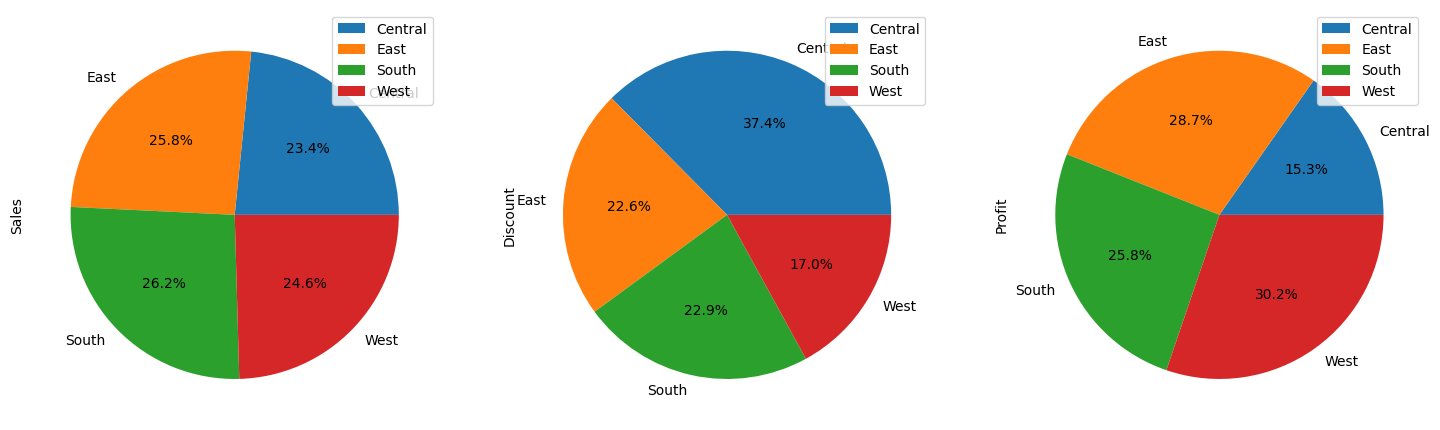

In [ ]:
df_region.plot.pie(subplots=True,
                   figsize=(18, 20),
                   autopct='%1.1f%%',
                   labels = df_region.index)

WEST : PROFIT IS HIGH

SHIP MODE WISE ANALYSIS

In [ ]:
df['Ship Mode'].value_counts()


Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [ ]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

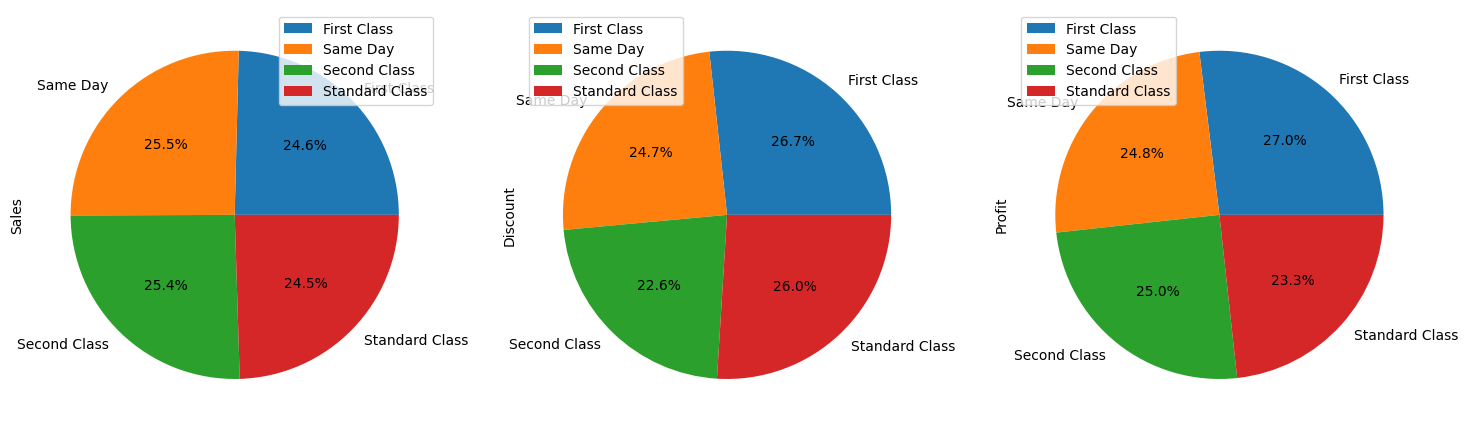

In [ ]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20),
                     autopct='%1.1f%%',
                     labels = df_shipmode.index)

*Profit and Discount is high in First Class
*Sales is high for Same day ship